In [53]:
import pandas as pd
import numpy as np


snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

snp_500_month_end = snp_500.resample('M').last()

# 결과 출력
snp_500_month_end.index = snp_500_month_end.index.to_period()
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))

snp_500_month_end

,Open,High,Low,Close,Adj Close,Volume,time
Date,,,,,,,
1927-12,17.660000,17.660000,17.660000,17.660000,17.660000,0,0
1928-01,17.570000,17.570000,17.570000,17.570000,17.570000,0,1
1928-02,17.260000,17.260000,17.260000,17.260000,17.260000,0,2
1928-03,19.280001,19.280001,19.280001,19.280001,19.280001,0,3
1928-04,19.750000,19.750000,19.750000,19.750000,19.750000,0,4
...,...,...,...,...,...,...,...
2020-07,3270.449951,3272.169922,3220.260010,3271.120117,3271.120117,5117260000,1111
2020-08,3509.729980,3514.770020,3493.250000,3500.310059,3500.310059,4342290000,1112
2020-09,3341.209961,3393.560059,3340.469971,3363.000000,3363.000000,4722530000,1113


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

C:\Users\crazy\AppData\Local\Temp\ipykernel_34868\1296936438.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


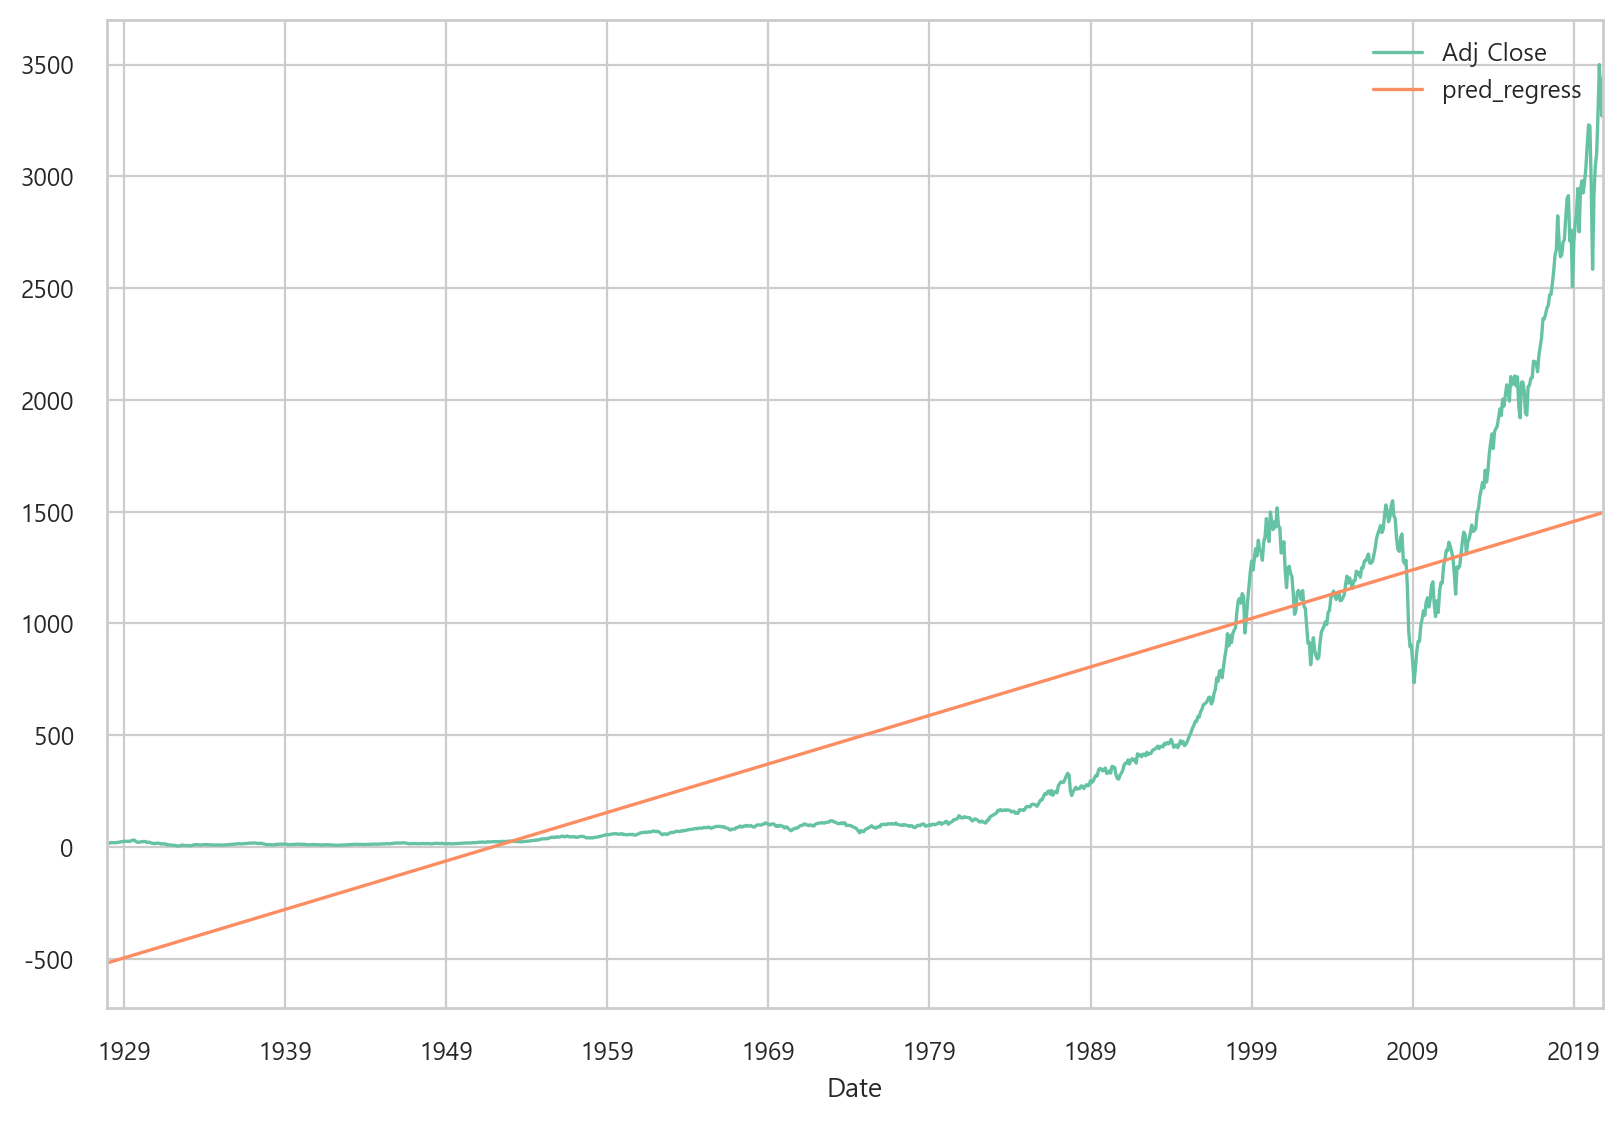

In [55]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = snp_500_month_end.loc[:, ['time']]
y = snp_500_month_end.loc[:, ['Adj Close']]

model_lr = LinearRegression()
model_lr.fit(X, y)


y_pred = pd.DataFrame(model_lr.predict(X), columns=["pred_regress"], index=X.index)

fig, ax = plt.subplots(1,1)

y.plot(ax=ax)
y_pred.plot(ax=ax);

In [56]:
snp_500_month_end['Lag_1'] = snp_500_month_end['Adj Close'].shift(1)
snp_500_month_end.head()

,Open,High,Low,Close,Adj Close,Volume,time,Lag_1
Date,,,,,,,,
1927-12,17.660000,17.660000,17.660000,17.660000,17.660000,0,0,NaN
1928-01,17.570000,17.570000,17.570000,17.570000,17.570000,0,1,17.660000
1928-02,17.260000,17.260000,17.260000,17.260000,17.260000,0,2,17.570000
1928-03,19.280001,19.280001,19.280001,19.280001,19.280001,0,3,17.260000
1928-04,19.750000,19.750000,19.750000,19.750000,19.750000,0,4,19.280001


In [57]:
from sklearn.linear_model import LinearRegression

X = snp_500_month_end.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = snp_500_month_end.loc[:, 'Adj Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0, 'Lag_1')

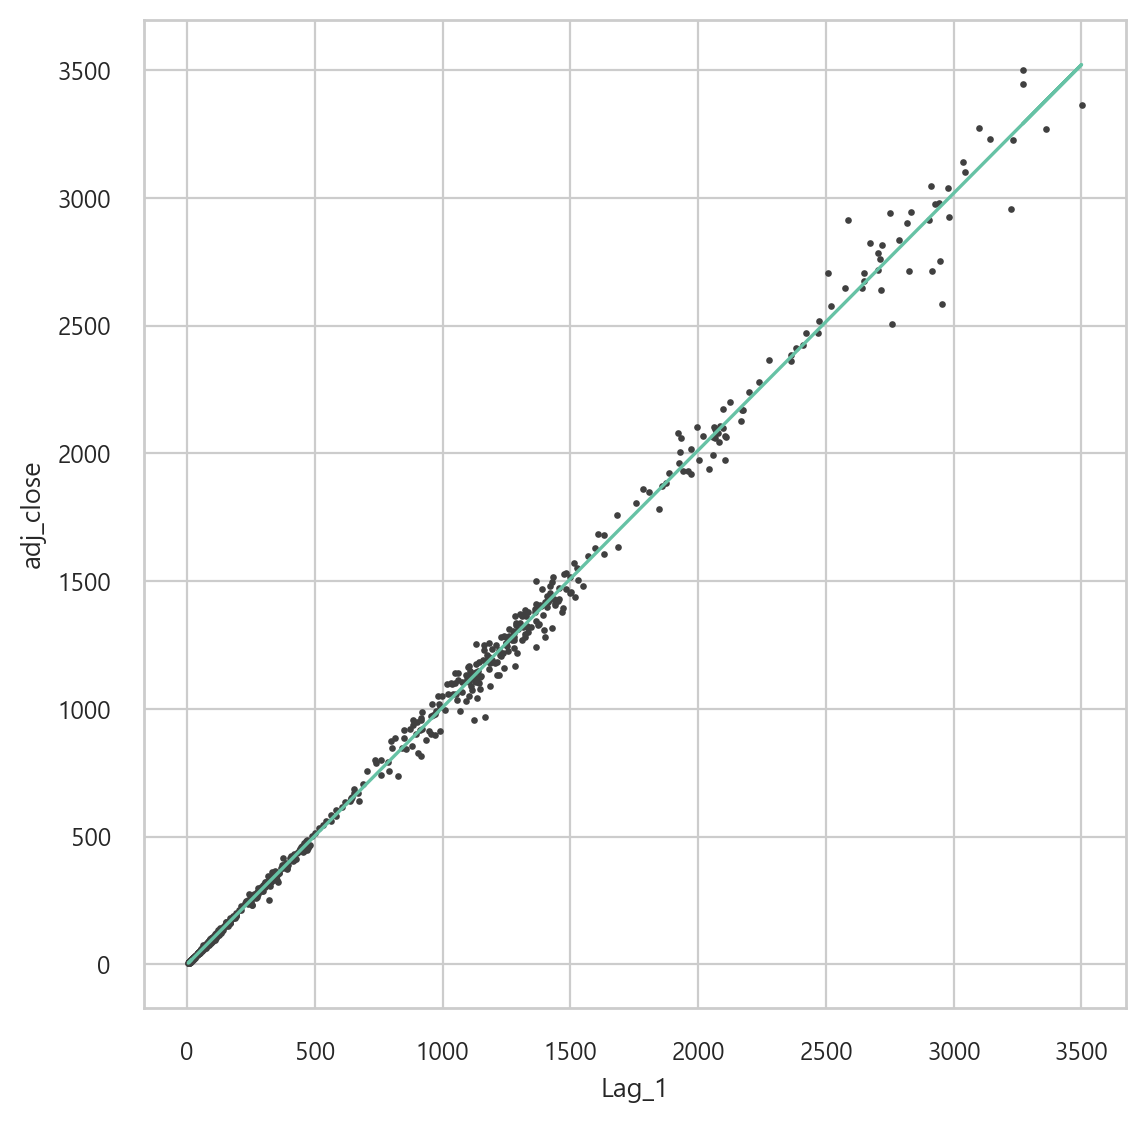

In [58]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('adj_close')
ax.set_xlabel('Lag_1')


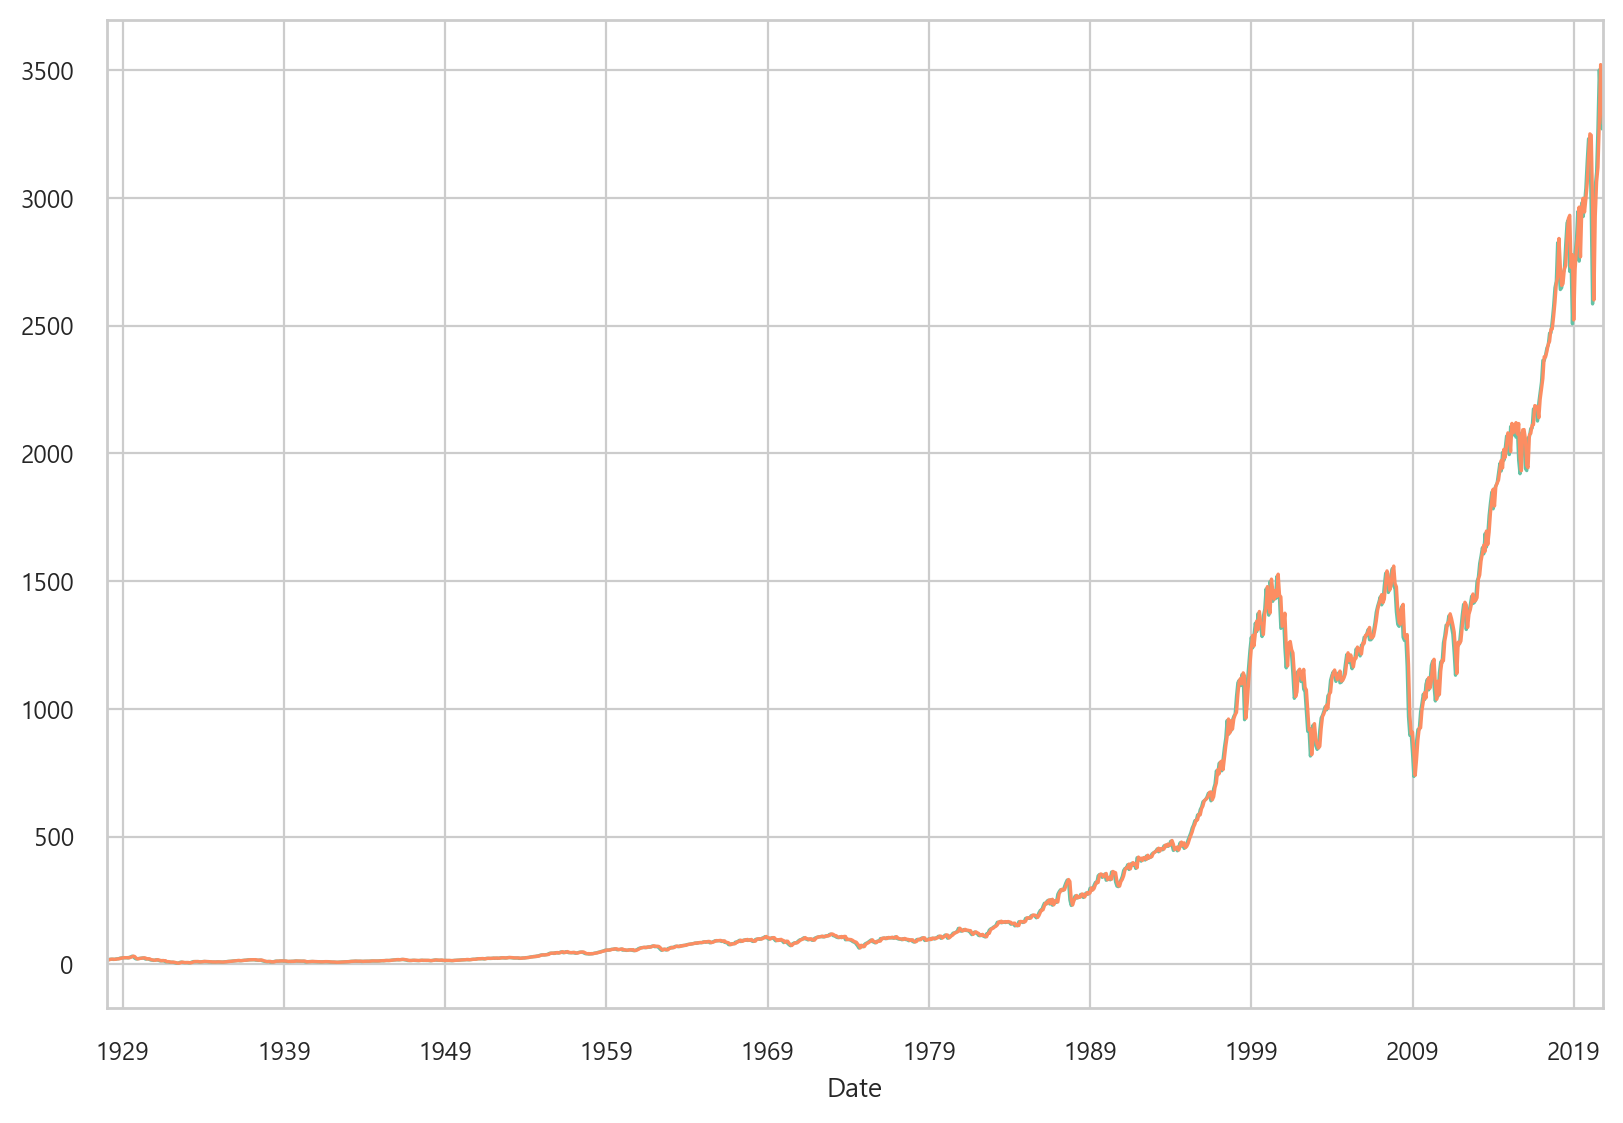

In [59]:
ax = y.plot()
ax = y_pred.plot()